<a href="https://colab.research.google.com/github/KSaiBharadwaj/fraudanalytics/blob/main/DSO562HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: **Create data points using SMOTE between P1 and P2 ; P1 and P3**

In [51]:
#  Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

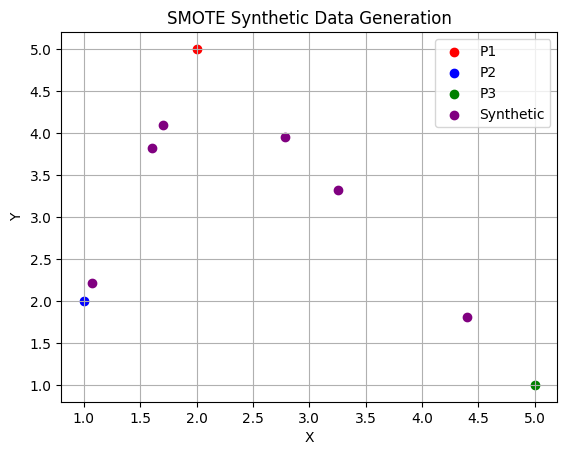

In [52]:
#  Creating a function to generate the smote data

def SMOTE_array(P1, P2, n):
  diff_y = P2[0][1] - P1[0][1]
  diff_x = P2[0][0] - P1[0][0]
  synthetic_samples = []
  for _ in range(n):
    # Randomly select a weight between 0 and 1
    synthetic_sample = []
    rand_weight = np.random.rand()
    synthetic_sample.append(P2[0][0] - rand_weight * diff_x)
    synthetic_sample.append(P2[0][1] - rand_weight * diff_y)
    synthetic_samples.append(synthetic_sample)
  return synthetic_samples

# Defining P1,2,3 and genarating points

P1 = [[2, 5]]
P2 = [[1, 2]]
P3 = [[5, 1]]

# Generate synthetic data points between P1 and P2
synthetic_data = SMOTE_array(P1, P2, 3)
synthetic_data = synthetic_data + SMOTE_array(P1, P3, 3)
synthetic_data



# Plot original data points
plt.scatter(P1[0][0], P1[0][1], color='red', label='P1')
plt.scatter(P2[0][0], P2[0][1], color='blue', label='P2')
plt.scatter(P3[0][0], P3[0][1], color='green', label='P3')

# Plot synthetic data points
synthetic_data = np.array(synthetic_data)
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], color='purple',
            label='Synthetic')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SMOTE Synthetic Data Generation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Problem 2: **Create 3 class of data and over sample Class 0 and 1**

<Axes: >

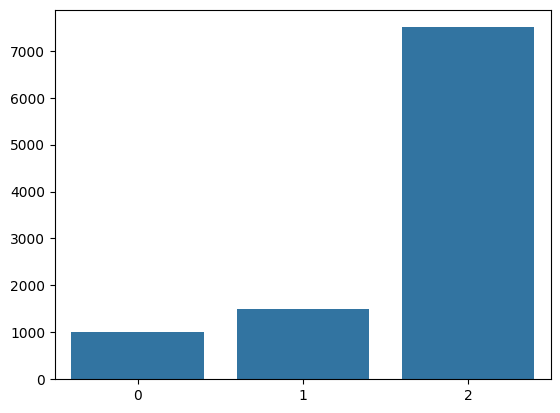

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# define dataset with 3 classes as 10, 15 and 75 percent
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_classes=3, n_redundant=0,
	n_repeated = 0, n_clusters_per_class=1, weights=[0.1, 0.15, 0.75], class_sep = 0.8, flip_y=0, random_state=1)

idx, c = np.unique(y, return_counts=True)
sns.barplot(x=idx, y = c)


<Axes: >

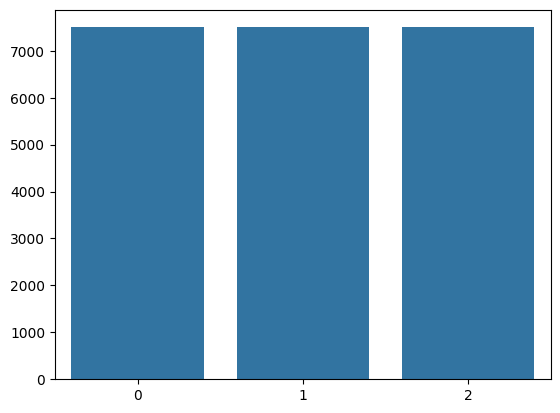

In [54]:
# Oversampling the data

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1).fit_resample(X,y)

idx, c = np.unique(y_resampled, return_counts=True)
sns.barplot(x=idx, y = c)